IMPORTING LIBRARIES

In [1]:
# Importing libraries, packages and setting some options
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
%matplotlib inline


READING IN DATA

INSPECTING/UNDERSTANDING DATA

In [2]:
# Reading in data
VideoGameSales = pd.read_csv(r"C:\Users\Jason\OneDrive\Video_Games_Sales_as_of_22_Dec_2016.csv")
# VideoGameSales = pd.read_csv(r"C:\Users\mjaso\OneDrive\Video_Games_Sales_as_of_22_Dec_2016.csv")

# Viewing the first 5 rows of data
VideoGameSales.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Viewing the last 5 rows of data
VideoGameSales.tail(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Viewing the number of rows and columns in the data
VideoGameSales.shape

(16719, 16)

In [5]:
# Checking the count of null values in the columns
VideoGameSales.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [248]:
# Checking for duplicates in data
VideoGameSales.duplicated().sum()

0

In [7]:
# Removing columns not needed for analysis
VideoGameSalesNew = VideoGameSales.drop(["Critic_Score", "Critic_Count", "User_Score", "User_Count", "Developer", "Rating"], axis=1)

In [8]:
# Checking nulls for subset data
VideoGameSalesNew.isnull().sum()

Name                 2
Platform             0
Year_of_Release    269
Genre                2
Publisher           54
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
dtype: int64

In [9]:
# Using only rows that are not N/A from Year_of_Release column
VideoGameSalesNew = VideoGameSalesNew[VideoGameSalesNew["Year_of_Release"].notna()]

In [10]:
# Checking that "Year_of_Release" column is updated
VideoGameSalesNew.isnull().sum()

Name                2
Platform            0
Year_of_Release     0
Genre               2
Publisher          32
NA_Sales            0
EU_Sales            0
JP_Sales            0
Other_Sales         0
Global_Sales        0
dtype: int64

In [11]:
# Checking if datatypes are correct
VideoGameSalesNew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16450 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16448 non-null  object 
 1   Platform         16450 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16448 non-null  object 
 4   Publisher        16418 non-null  object 
 5   NA_Sales         16450 non-null  float64
 6   EU_Sales         16450 non-null  float64
 7   JP_Sales         16450 non-null  float64
 8   Other_Sales      16450 non-null  float64
 9   Global_Sales     16450 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [12]:
# Changing "Year_of_Release" datatype from float to int
VideoGameSalesNew["Year_of_Release"] = VideoGameSalesNew["Year_of_Release"].astype(int)

In [13]:
# Checking that "Year_of_Release" datatype has been updated
VideoGameSalesNew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16450 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16448 non-null  object 
 1   Platform         16450 non-null  object 
 2   Year_of_Release  16450 non-null  int32  
 3   Genre            16448 non-null  object 
 4   Publisher        16418 non-null  object 
 5   NA_Sales         16450 non-null  float64
 6   EU_Sales         16450 non-null  float64
 7   JP_Sales         16450 non-null  float64
 8   Other_Sales      16450 non-null  float64
 9   Global_Sales     16450 non-null  float64
dtypes: float64(5), int32(1), object(4)
memory usage: 1.3+ MB


In [14]:
# Converting "Year_of_Release" column to date format
VideoGameSalesNew["Year_of_Release"] = pd.to_datetime(VideoGameSalesNew["Year_of_Release"].astype(str), format="%Y")

In [15]:
# Checking that "Year_of_Release" datatype has been updated
VideoGameSalesNew.info()

# Viewing first 3 rows of data
VideoGameSalesNew.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16450 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Name             16448 non-null  object        
 1   Platform         16450 non-null  object        
 2   Year_of_Release  16450 non-null  datetime64[ns]
 3   Genre            16448 non-null  object        
 4   Publisher        16418 non-null  object        
 5   NA_Sales         16450 non-null  float64       
 6   EU_Sales         16450 non-null  float64       
 7   JP_Sales         16450 non-null  float64       
 8   Other_Sales      16450 non-null  float64       
 9   Global_Sales     16450 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52


In [16]:
# Setting the "Year_of_Release" column in just the year format
VideoGameSalesNew.Year_of_Release = VideoGameSalesNew["Year_of_Release"].dt.year

In [17]:
# Checking that the changes updated to the column
VideoGameSalesNew["Year_of_Release"]

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16714    2016
16715    2006
16716    2016
16717    2003
16718    2016
Name: Year_of_Release, Length: 16450, dtype: int64

In [18]:
# Rechecking size of data 
VideoGameSalesNew.shape

(16450, 10)

In [19]:
# checking statistical data
VideoGameSalesNew.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16450.000000,16450.000000,16450.000000,16450.000000,16450.000000,16450.000000
mean,2006.487356,0.264041,0.145909,0.078464,0.047582,0.536252
std,5.878995,0.818324,0.506639,0.311046,0.187973,1.558437
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000


In [20]:
# Checking categorical data
VideoGameSalesNew.describe(include="object") 

,Name,Platform,Genre,Publisher
count,16448,16450,16448,16418
unique,11429,31,12,580
top,Need for Speed: Most Wanted,PS2,Action,Electronic Arts
freq,12,2127,3308,1344


In [21]:
# Checking unique values in all columms
for col in VideoGameSalesNew.columns:
    unique_count = VideoGameSalesNew[col].nunique()
    print(f"{col} has {str(unique_count)} unique values")

Name has 11429 unique values
Platform has 31 unique values
Year_of_Release has 39 unique values
Genre has 12 unique values
Publisher has 580 unique values
NA_Sales has 401 unique values
EU_Sales has 307 unique values
JP_Sales has 244 unique values
Other_Sales has 155 unique values
Global_Sales has 628 unique values


EDA AND VISUALIZATIONS

In [247]:
# Top 10 count of Names of games across all platforms
TopGames = VideoGameSalesNew["Name"].value_counts()[:10]
TopGames = pd.DataFrame(TopGames)
TopGames

,Name
Need for Speed: Most Wanted,12
FIFA 14,9
LEGO Marvel Super Heroes,9
Ratatouille,9
Madden NFL 08,8
Angry Birds Star Wars,8
Lego Batman 3: Beyond Gotham,8
LEGO The Hobbit,8
Cars,8
FIFA Soccer 13,8


In [246]:
# Top 10 Platforms for all games
TopPlatforms = VideoGameSalesNew["Platform"].value_counts()[:10]
TopPlatforms = pd.DataFrame(TopPlatforms)
TopPlatforms

,Platform
PS2,2127
DS,2122
PS3,1306
Wii,1286
X360,1232
PSP,1193
PS,1190
PC,957
GBA,811
XB,803


This graph represents the platform that produced the most games


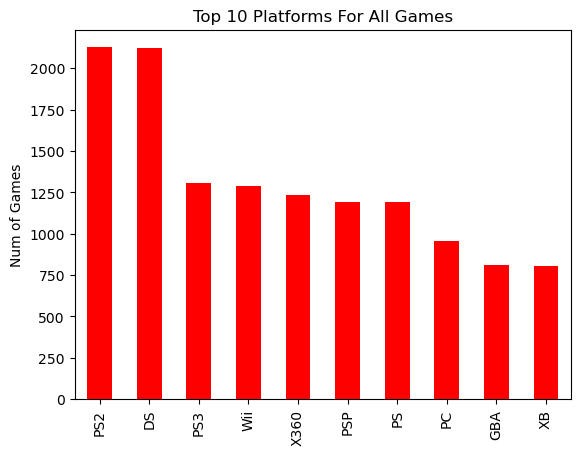

In [245]:
# Graph of Top 10 Platforms for all games
TopPlatforms.plot(kind="bar", color="red"), plt.title("Top 10 Platforms For All Games"), plt.ylabel("Num of Platforms"), plt.ylabel("Num of Games")
print("This graph represents the platform that produced the most games")

In [244]:
# Top 10 Platforms and Year_of_Release with most NA_Sales
TopPlatformsbyNASalesPerYear = VideoGameSalesNew.groupby(["Year_of_Release", "Platform"]).sum()["NA_Sales"].sort_values(ascending=False)[:10]
TopPlatformsbyNASalesPerYear = pd.DataFrame(TopPlatformsbyNASalesPerYear)
TopPlatformsbyNASalesPerYear



,,NA_Sales
Year_of_Release,Platform,
2009,Wii,114.55
2010,X360,107.38
2008,Wii,97.12
2004,PS2,96.78
2002,PS2,96.54
2011,X360,86.75
2005,PS2,85.60
2003,PS2,83.54
1998,PS,83.22


This graph shows that the platform Wii in the year 2009, produced the most NA sales.


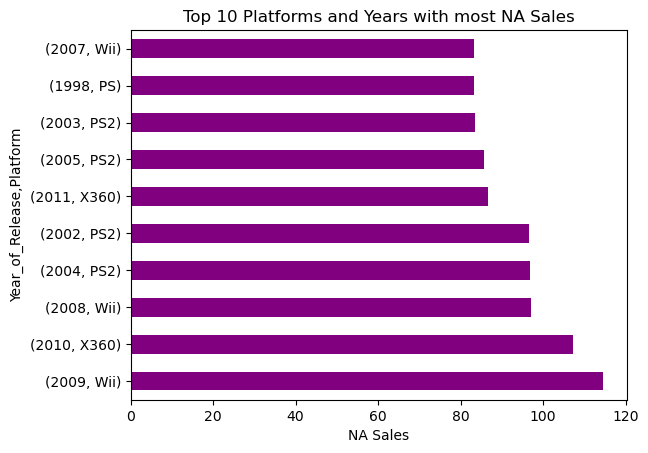

In [243]:
# Graph of Top 10 Platforms and Year_of_Release with most NA_Sales
TopPlatformsbyNASalesPerYear.plot(kind="barh", color="purple"), plt.title("Top 10 Platforms and Years with most NA Sales"), plt.xlabel("NA Sales")
print("This graph shows that the platform Wii in the year 2009, produced the most NA sales.")

In [242]:
# Top 10 Year_of_Release with most NA_Sales
TopNASalesByYear = VideoGameSalesNew.groupby("Year_of_Release").sum()["NA_Sales"].sort_values(ascending=False)[:10]
TopNASalesByYear = pd.DataFrame(TopNASalesByYear)
TopNASalesByYear

,NA_Sales
Year_of_Release,
2008,348.69
2009,335.55
2007,309.89
2010,300.65
2006,262.13
2005,242.15
2011,238.79
2004,222.51
2002,216.19


This graphs shows that the year 2008 produced the most NA sales.


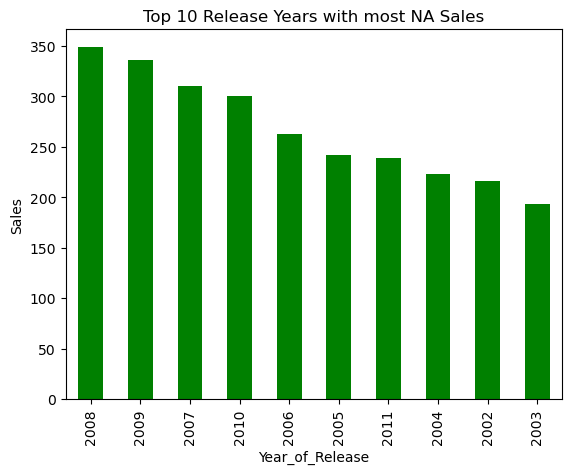

In [238]:
# Graph of Top 10 Year_of_Release with most NA_Sales
TopNASalesByYear.plot(kind="bar", color="green"), plt.title("Top 10 Release Years with most NA Sales"), plt.ylabel("Sales")
print("This graphs shows that the year 2008 produced the most NA sales.")


In [237]:
# Top 10 Platforms and Year_of_Release with most EU_Sales
TopPlatformsbyEUSalesPerYear = VideoGameSalesNew.groupby(["Year_of_Release", "Platform"]).sum()["EU_Sales"].sort_values(ascending=False)[:10]
TopPlatformsbyEUSalesPerYear = pd.DataFrame(TopPlatformsbyEUSalesPerYear)
TopPlatformsbyEUSalesPerYear

,,EU_Sales
Year_of_Release,Platform,
2002,PS2,65.27
2003,PS2,61.20
2009,Wii,58.31
2011,PS3,56.24
2004,PS2,56.01
2001,PS2,52.37
2015,PS4,51.76
2010,PS3,50.50
1998,PS,48.74


This graph is a represents the platfor PS2 in the year 2002, as having the most EU sales.


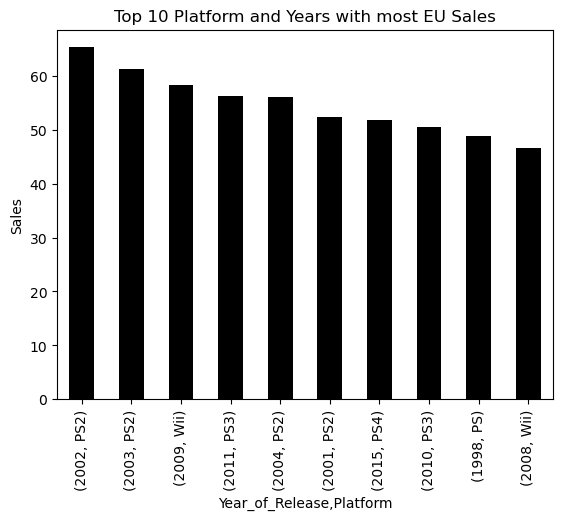

In [236]:
# Graph of Top 10 Platforms and Year_of_Release with most EU_Sales
TopPlatformsbyEUSalesPerYear.plot(kind="bar", color="black"), plt.title("Top 10 Platform and Years with most EU Sales"), plt.ylabel("Sales")
print("This graph is a represents the platfor PS2 in the year 2002, as having the most EU sales.")

In [235]:
# Top 10 Year_of_Release with most EU_Sales
TopEUSalesByYear = VideoGameSalesNew.groupby("Year_of_Release").sum()["EU_Sales"].sort_values(ascending=False)[:10]
TopEUSalesByYear = pd.DataFrame(TopEUSalesByYear)
TopEUSalesByYear

,EU_Sales
Year_of_Release,
2009,187.94
2008,181.14
2010,171.42
2011,162.97
2007,157.82
2006,127.89
2014,122.74
2013,121.55
2005,121.11


This graph represents the year 2009 as having the most EU sales.


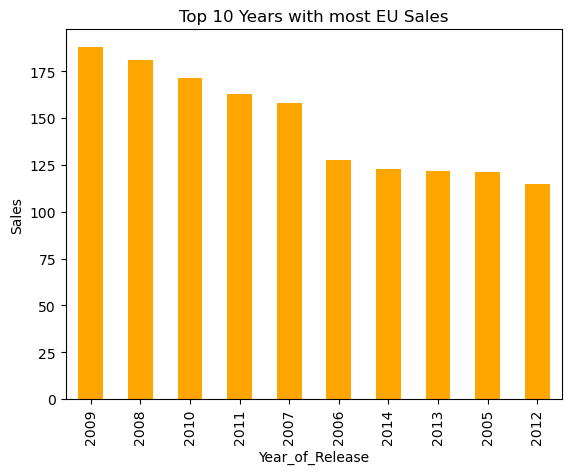

In [234]:
# Graph of Top 10 Year_of_Releas with most EU_Sales
TopEUSalesByYear.plot(kind="bar", color="orange"), plt.title("Top 10 Years with most EU Sales"), plt.ylabel("Sales")
print("This graph represents the year 2009 as having the most EU sales.")

In [233]:
# Top 10 Platforms and Year_of_Release with most JP_Sales
TopPlatformsbyJPSalesPerYear = VideoGameSalesNew.groupby(["Year_of_Release", "Platform"]).sum()["JP_Sales"].sort_values(ascending=False)[:10]
TopPlatformsbyJPSalesPerYear = pd.DataFrame(TopPlatformsbyJPSalesPerYear)
TopPlatformsbyJPSalesPerYear

,,JP_Sales
Year_of_Release,Platform,
2006,DS,38.56
1997,PS,33.10
2005,DS,29.86
1998,PS,28.48
1999,PS,28.07
2007,DS,26.81
2009,DS,24.21
2008,DS,24.01
2013,3DS,23.57


This graph represents the platform DS in the year 2006, having the most JP sales.  


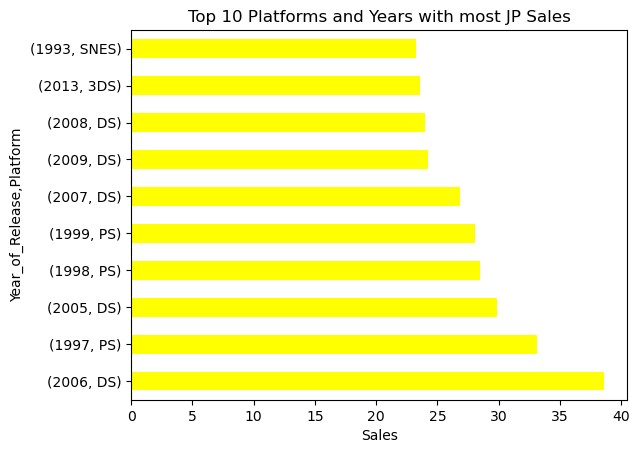

In [232]:
# Graph of Top 10 Platforms and Year_of_Release with most JP_Sales
TopPlatformsbyJPSalesPerYear.plot(kind="barh", color="yellow"), plt.title("Top 10 Platforms and Years with most JP Sales"), plt.xlabel("Sales")
print("This graph represents the platform DS in the year 2006, having the most JP sales.  ")

In [231]:
# Top 10 Year_of_Release with most JP_Sales
TopJPSalesByYear = VideoGameSalesNew.groupby("Year_of_Release").sum()["JP_Sales"].sort_values(ascending=False)[:10]
TopJPSalesByYear = pd.DataFrame(TopJPSalesByYear)
TopJPSalesByYear

,JP_Sales
Year_of_Release,
2006,73.74
2009,61.89
2007,60.29
2008,60.25
2010,59.49
1996,57.44
2005,54.27
2011,53.07
1999,52.34


This graph shows that the year 2008 had the most sales.


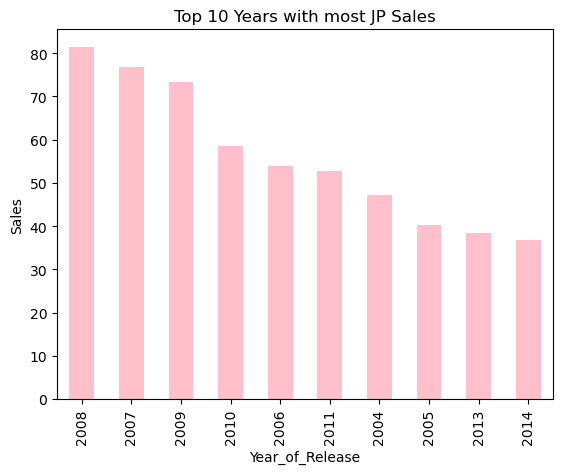

In [230]:
# Graph of Top 10 Year_of_Release with most JP_Sales
TopJPSalesByYear.plot(kind="bar", color="pink"), plt.title("Top 10 Years with most JP Sales"), plt.ylabel("Sales")
print("This graph shows that the year 2008 had the most sales.")

In [229]:
# Top 10 Platforms and Year_of_Release with most Other_Sales
TopPlatformsbyOtherSalesPerYear = VideoGameSalesNew.groupby(["Year_of_Release", "Platform"]).sum()["Other_Sales"].sort_values(ascending=False)[:10]
TopPlatformsbyOtherSalesPerYear = pd.DataFrame(TopPlatformsbyOtherSalesPerYear)
TopPlatformsbyOtherSalesPerYear

,,Other_Sales
Year_of_Release,Platform,
2004,PS2,39.85
2007,PS2,23.69
2002,PS2,21.72
2011,PS3,21.56
2010,PS3,20.81
2003,PS2,20.69
2008,PS2,19.31
2005,PS2,19.15
2015,PS4,18.46


This graph represents the platform PS2 and the year 2004, having the most Other sales.


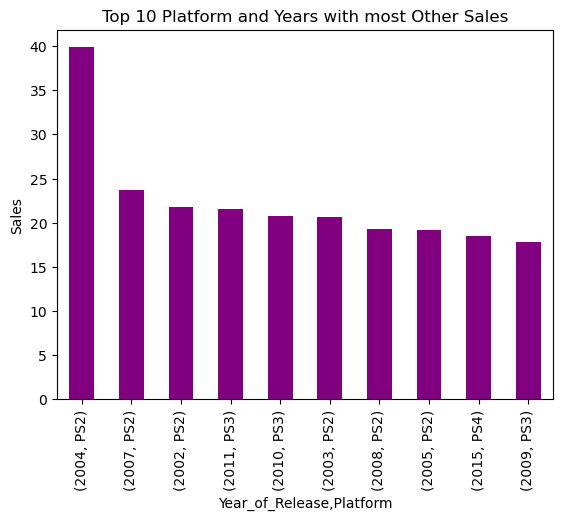

In [227]:
# Graph of Top 10 Platforms and Year_of_Release with most Other_Sales
TopPlatformsbyOtherSalesPerYear.plot(kind="bar", color="purple"), plt.title("Top 10 Platform and Years with most Other Sales"), plt.ylabel("Sales")
print("This graph represents the platform PS2 and the year 2004, having the most Other sales.")

In [225]:
# Top 10 Year_of_Release with most Other_Sales
TopOtherSalesByYear = VideoGameSalesNew.groupby("Year_of_Release").sum()["Other_Sales"].sort_values(ascending=False)[:10]
TopOtherSalesByYear = pd.DataFrame(TopOtherSalesByYear)
TopOtherSalesByYear

,Other_Sales
Year_of_Release,
2008,81.42
2007,76.75
2009,73.44
2010,58.57
2006,53.95
2011,52.75
2004,47.24
2005,40.29
2013,38.35


This graphs represents the top 10 years with the most 'Other Sales', with 2008 being number one.


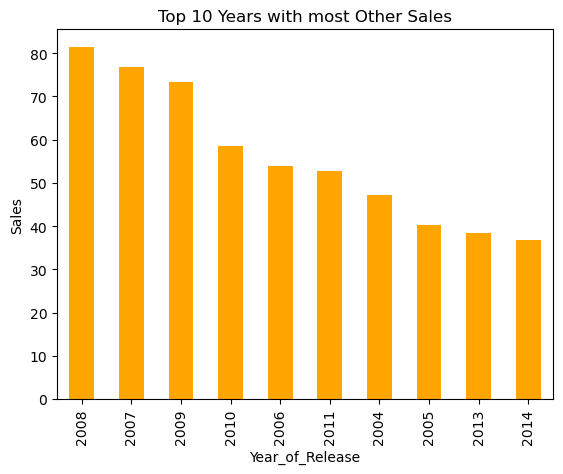

In [224]:
# Graph of Top 10 Year_of_Release with most Other_Sales
TopOtherSalesByYear.plot(kind="bar", color="orange"), plt.title("Top 10 Years with most Other Sales"), plt.ylabel("Sales")
print(f"This graphs represents the top 10 years with the most 'Other Sales', with 2008 being number one.")

In [221]:
# Top 10 Platforms and Year_of_Release with most Global_Sales
TopPlatformsbyGlobalSalesPerYear = VideoGameSalesNew.groupby(["Year_of_Release", "Platform"]).sum()["Global_Sales"].sort_values(ascending=False)[:10]
TopPlatformsbyGlobalSalesPerYear = pd.DataFrame(TopPlatformsbyGlobalSalesPerYear)
TopPlatformsbyGlobalSalesPerYear

,,Global_Sales
Year_of_Release,Platform,
2004,PS2,211.78
2009,Wii,207.08
2002,PS2,205.40
2003,PS2,184.29
2008,Wii,171.45
2010,X360,170.08
1998,PS,169.58
2001,PS2,166.43
2005,PS2,160.65


This graph shows us that the platform PS2, in the year 2004, produced the most global sales!


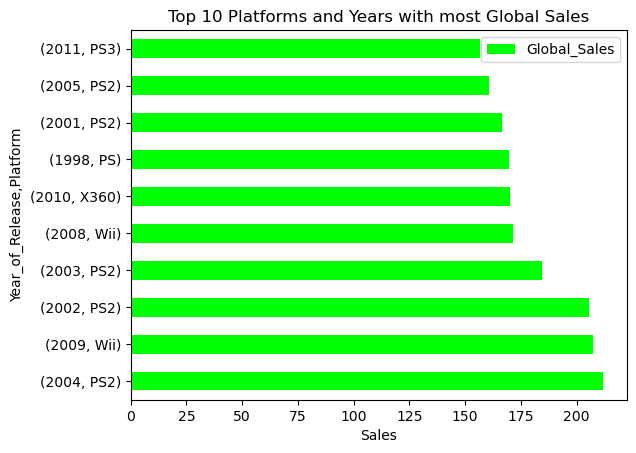

In [226]:
# Graph of Top 10 Platforms and Year_of_Release with most Global_Sales
TopPlatformsbyGlobalSalesPerYear.plot(kind="barh", color="lime"), plt.title("Top 10 Platforms and Years with most Global Sales"), plt.xlabel("Sales")
print(f"This graph shows us that the platform PS2, in the year 2004, produced the most global sales!")

In [220]:
# Top 10 Year_of_Release with most Global_Sales
TopGlobalSalesByYear = VideoGameSalesNew.groupby("Year_of_Release").sum()["Global_Sales"].sort_values(ascending=False)[:10]
TopGlobalSalesByYear = pd.DataFrame(TopGlobalSalesByYear)
TopGlobalSalesByYear


,Global_Sales
Year_of_Release,
2008,671.79
2009,658.88
2007,605.37
2010,590.59
2006,518.22
2011,507.79
2005,458.31
2004,419.05
2002,395.51


This graph shows us that the year 2008 produced the most global sales!


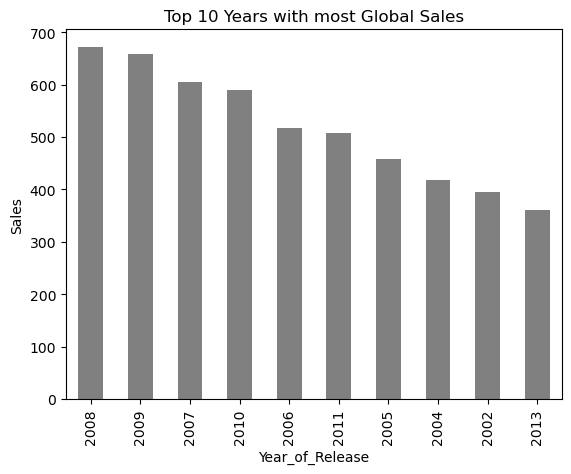

In [110]:
# Graph of Top 10 Year_of_Release with most Global_Sales
TopGlobalSalesByYear.plot(kind="bar", color="grey"), plt.title("Top 10 Years with most Global Sales"), plt.ylabel("Sales")
print(f"This graph shows us that the year 2008 produced the most global sales.")

In [216]:
# Calculating the total saled for the NA region
NA_Sales_Total = VideoGameSalesNew["NA_Sales"].sum()
NA_Sales_Total
print("Total sales for NA_Sales =", NA_Sales_Total)


Total sales for NA_Sales = 4343.47


In [215]:
# Calculating the total sales for the EU region
EU_Sales_Total = VideoGameSalesNew["EU_Sales"].sum()
EU_Sales_Total
print("Total sales for EU_Sales =", EU_Sales_Total)

Total sales for EU_Sales = 2400.21


In [214]:
# Calculating the total sales for the JP region
JP_Sales_Total = VideoGameSalesNew["JP_Sales"].sum()
JP_Sales_Total
print("Total sales for JP_Sales =", JP_Sales_Total)

Total sales for JP_Sales = 1290.7299999999998


In [213]:
# Calculating the total sales for the Other region
Other_Sales_Total = VideoGameSalesNew["Other_Sales"].sum()
Other_Sales_Total
print("Total sales for Other_Sales =", Other_Sales_Total)

Total sales for Other_Sales = 782.73


In [168]:
# Creating a DataFrame for the total sales of all regions
Sales = {"Name": ["NA", "EU", "JP", "Other"],
         "Profit": pd.Series([NA_Sales_Total, EU_Sales_Total, JP_Sales_Total, Other_Sales_Total])}
Game_Sales = pd.DataFrame(Sales)
Game_Sales      

,Name,Profit
0,NA,4343.47
1,EU,2400.21
2,JP,1290.73
3,Other,782.73


This bar graph shows us that the North American regions has generated the most Sales of all regions.


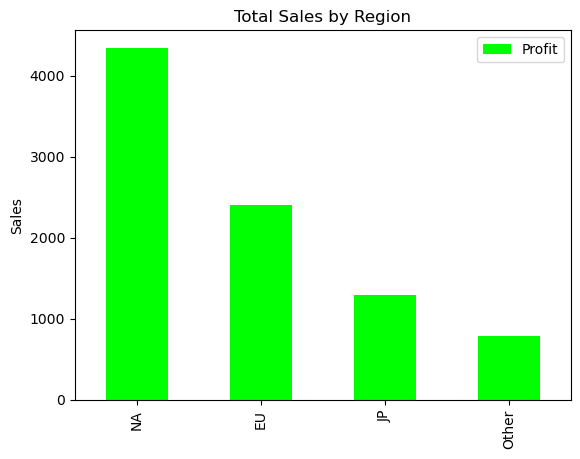

In [208]:

# Graph of the Total Sales of all Regions
Game_Sales.plot(kind="bar", color="lime"), plt.title("Total Sales by Region"), plt.ylabel("Sales"), plt.xticks([0,1,2,3], ["NA", "EU", "JP", "Other"])
print(f"This bar graph shows us that the North American regions has generated the most Sales of all regions.")

This pie chart illustrates how much of the total sales per region are distributed.


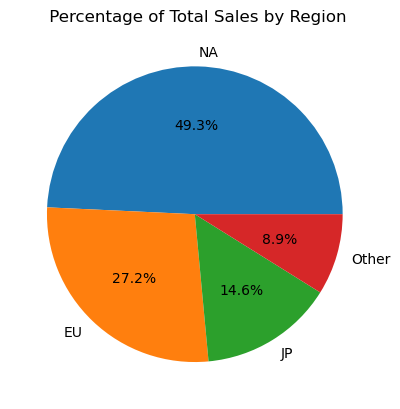

In [209]:
# Plotting a Pie Chart of Percent of Total Sales by Region
plt.pie(Game_Sales["Profit"], labels=Game_Sales["Name"], autopct="%1.1f%%"), plt.title(" Percentage of Total Sales by Region")
print(f"This pie chart illustrates how much of the total sales per region are distributed.")